In [3]:
import pandas as pd 
df = pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df[df['title'].str.contains('Toy Story')]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2355,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
7355,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX


In [5]:
df[df['genres'].str.contains('Adventure|Animation')]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
9,10,GoldenEye (1995),Action|Adventure|Thriller
12,13,Balto (1995),Adventure|Animation|Children
...,...,...,...
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
9735,193573,Love Live! The School Idol Movie (2015),Animation
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy


In [6]:
genres = df['genres'].str.get_dummies()
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_movies = pd.concat([df, genres], axis=1)
df_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_genres = scaler.fit_transform(genres)
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [12]:
dft = pd.DataFrame(scaled_genres)
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.05918,-0.480607,2.591019,3.865793,3.697524,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
1,-0.05918,-0.480607,2.591019,-0.258679,3.697524,-0.792126,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
2,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
3,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
4,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065


In [13]:
genres.sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(scaled_genres)

KMeans(n_clusters=3)

In [16]:
model.labels_

array([0, 0, 1, ..., 1, 0, 1])

In [17]:
model.cluster_centers_

array([[-5.91799474e-02, -9.83636693e-02,  8.94990789e-01,
         2.23936700e+00,  2.58666413e+00,  2.53053902e-01,
        -3.28210136e-01, -2.01752791e-01, -5.93550134e-01,
         8.85938472e-01, -9.49256298e-02, -2.72433494e-01,
         1.90687065e-01,  4.10245620e-01, -1.29610204e-01,
        -2.71929030e-01,  4.58247445e-02, -4.69238529e-01,
        -1.73958542e-01, -8.17119062e-02],
       [ 2.73472997e-02, -4.71765599e-01, -2.75591148e-01,
        -2.51870031e-01, -2.70451223e-01,  8.42108747e-02,
        -4.02251702e-02,  9.61665160e-02,  1.80283206e-01,
        -1.54817817e-01,  3.42937242e-02, -1.64301042e-02,
        -1.16515439e-01,  4.63630223e-04,  1.15450530e-02,
         1.46150922e-01, -3.14975416e-01, -9.60957184e-02,
        -1.41248218e-02,  9.03088151e-04],
       [-5.91799474e-02,  1.49637762e+00,  4.69533676e-01,
        -1.74701014e-01, -2.64942696e-01, -3.67145090e-01,
         2.63450816e-01, -2.10804458e-01, -3.03724193e-01,
         1.00999351e-01, -6.5

In [21]:
df_movies[model.labels_ == 1].head(15)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
13,14,Nixon (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,16,Casino (1995),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,17,Sense and Sensibility (1995),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17,18,Four Rooms (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=20)
model.fit(scaled_genres)

KMeans(n_clusters=20)

In [23]:
df_movies[model.labels_ == 0].head(19)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
62,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
81,92,Mary Reilly (1996),Drama|Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
82,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
125,152,"Addiction, The (1995)",Drama|Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
149,177,Lord of Illusions (1995),Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
154,183,Mute Witness (1994),Comedy|Horror|Thriller,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
188,220,Castle Freak (1995),Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
217,253,Interview with the Vampire: The Vampire Chroni...,Drama|Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
247,285,Beyond Bedlam (1993),Drama|Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
df_movies[model.labels_ == 1].head(19)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
13,14,Nixon (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,26,Othello (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,31,Dangerous Minds (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,40,"Cry, the Beloved Country (1995)",Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,43,Restoration (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,53,Lamerica (1994),Adventure|Drama,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,55,Georgia (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,57,Home for the Holidays (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,61,Eye for an Eye (1996),Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
55,62,Mr. Holland's Opus (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Felipe Martins Guimarães
df_movies[model.labels_ == 0].head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
62,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
81,92,Mary Reilly (1996),Drama|Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
82,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
125,152,"Addiction, The (1995)",Drama|Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:

df_clusters = pd.DataFrame(model.cluster_centers_, columns=genres.columns)
df_clusters.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.249378,-0.354938,-0.258679,-0.270451,-0.360528,-0.179102,-0.217489,-0.575545,-0.166795,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.362892,-0.334435,0.675652,-0.202020,-0.132065
1,-0.05918,-0.367822,-0.299261,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.990829,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.039011,-0.202020,-0.132065
2,-0.05918,-0.311278,-0.294232,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.297447,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.449091,-0.202020,-0.132065
3,-0.05918,-0.441946,-0.172506,-0.071911,0.148807,0.308803,-0.282740,0.000567,-0.088237,0.108654,-0.094926,-0.246157,-0.128397,5.307322,-0.169794,0.352625,-0.259162,-0.462653,-0.163136,-0.132065
4,-0.05918,0.903419,0.728746,-0.258679,-0.270451,-0.400564,-0.299557,-0.217489,-0.462865,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.240457,-0.351764,2.990120,0.318918,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DA68280>,
      dtype=object)

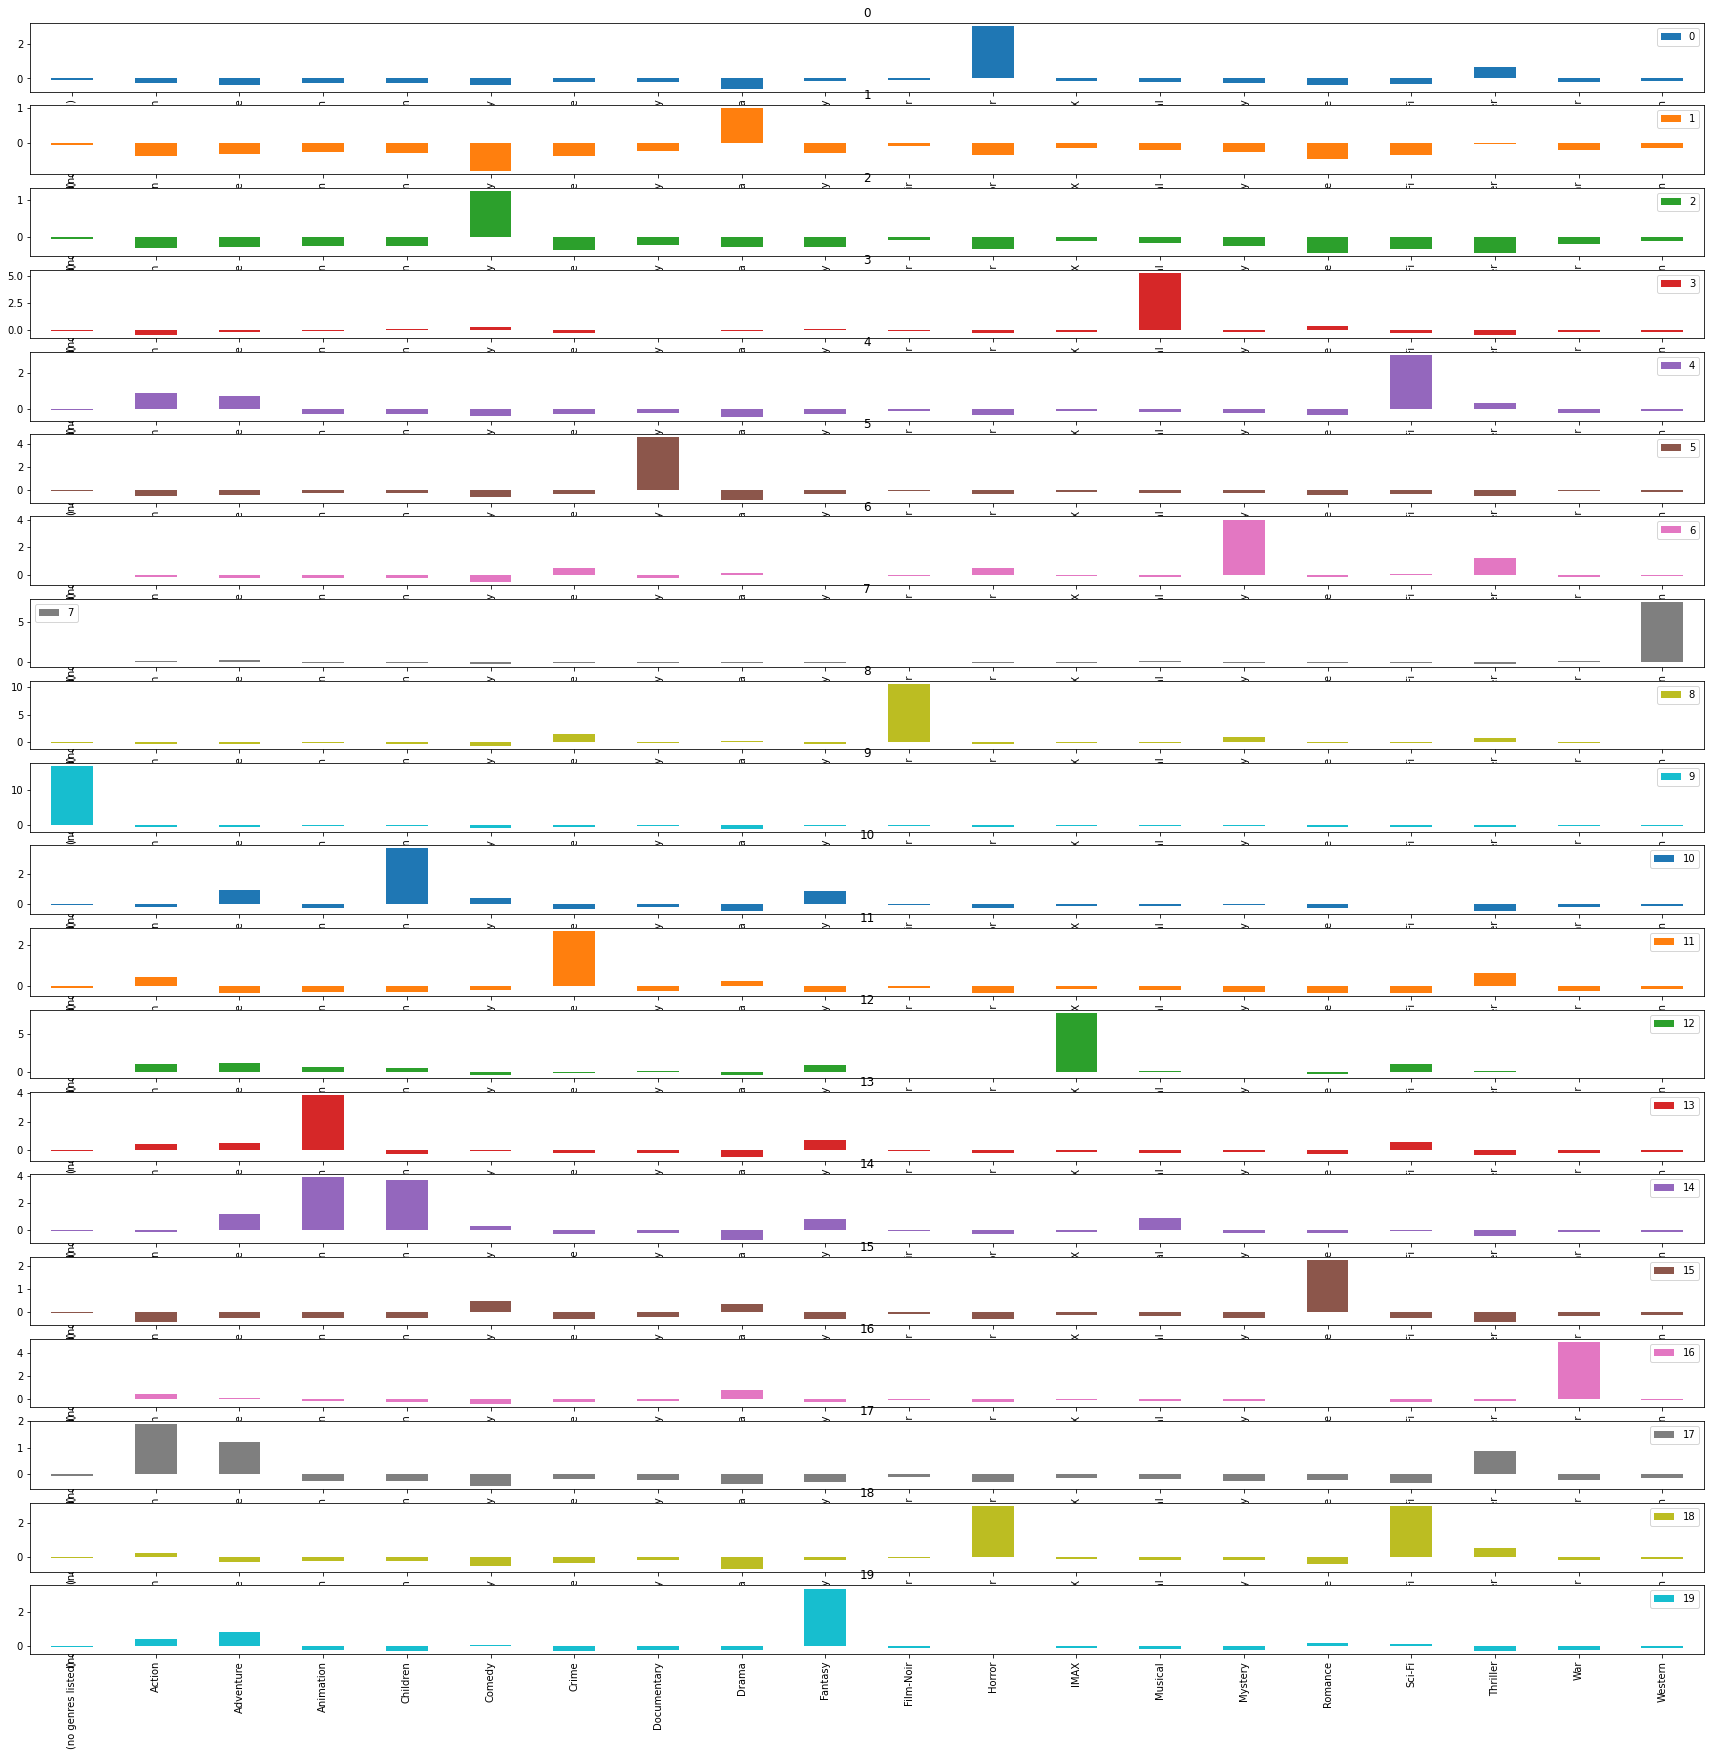

In [32]:
df_clusters.transpose()
df_clusters.transpose().plot.bar(subplots=True, figsize=(30,30), sharex=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000107E6760>,
      dtype=object)

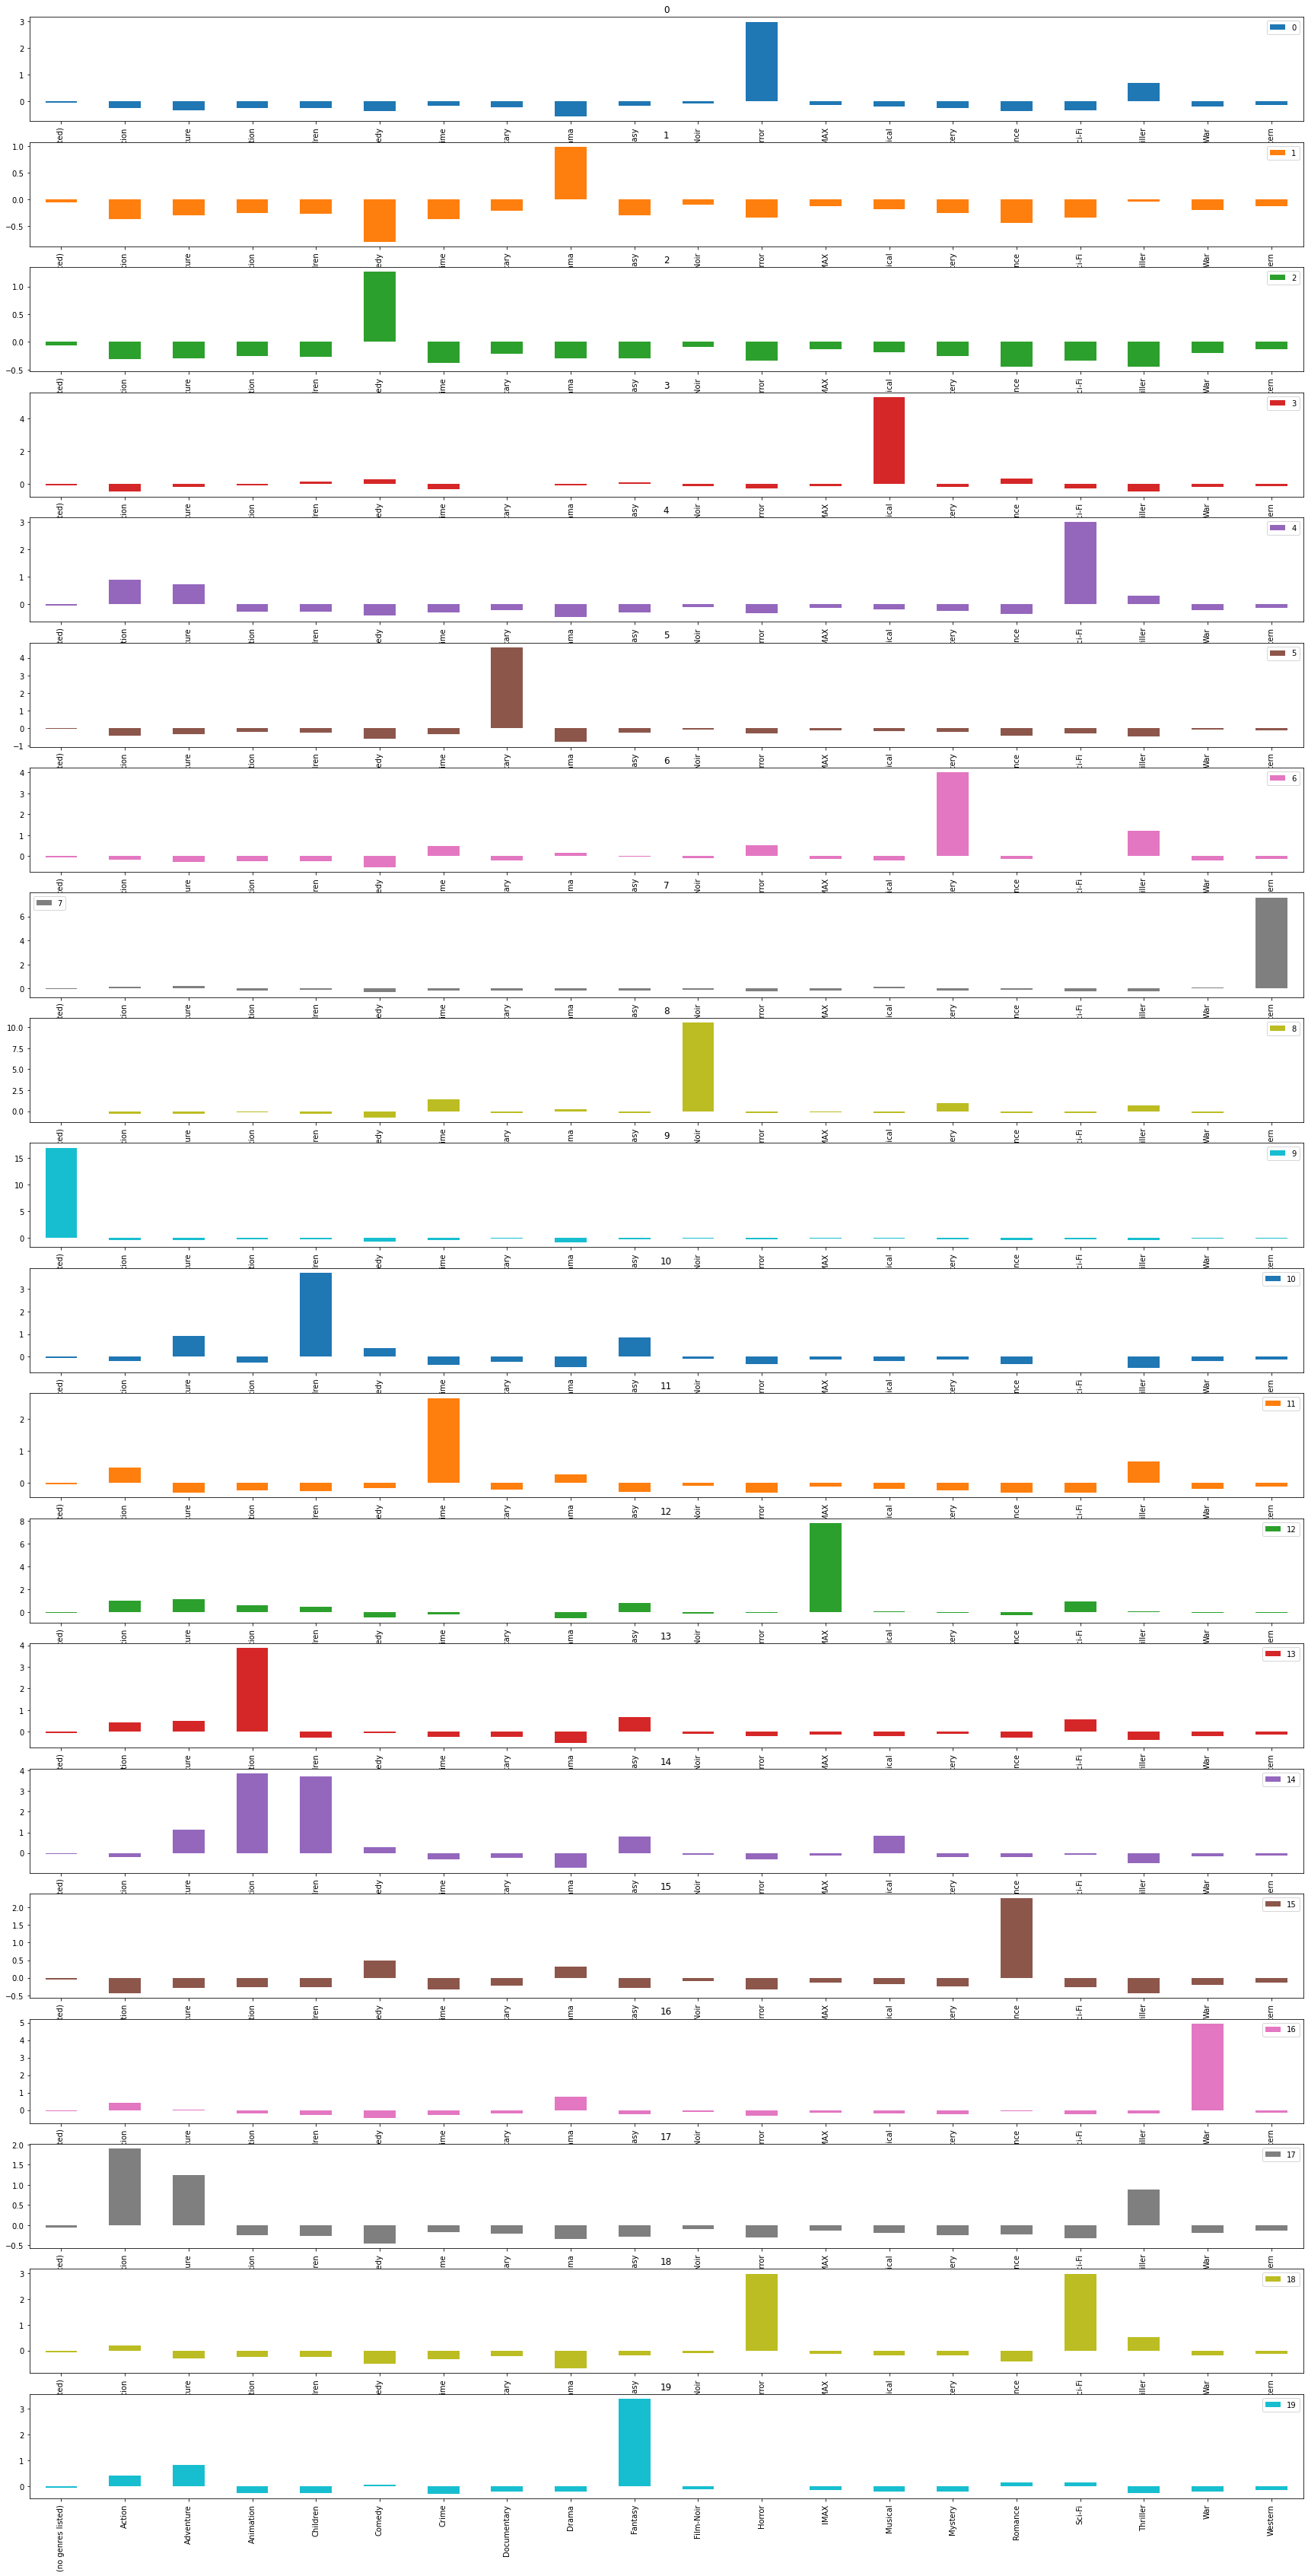

In [33]:
df_clusters.transpose().plot.bar(subplots=True, figsize=(30,60), sharex=False)

In [75]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(scaled_genres)

In [79]:
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [ ]:
visualizacao

In [ ]:
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize': (10,10)})

In [ ]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=model.labels_, palette=sns.color_palette('Set1', 20))

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(scaled_genres)

In [ ]:
from sklearn.cluster import KMeans

def get_kmeans (numero_clusters):
    
    model = KMeans(n_clusters=numero_clusters)
    model.fit(scaled_genres)
    return [numero_clusters, model.inertia_]

In [49]:
get_kmeans(3)

[3, 168063.6322669379]

In [50]:
get_kmeans(20)

[20, 55461.89217545895]

In [51]:
get_kmeans(41)

[41, 35308.62954802972]

In [64]:
resultado = []

for numero_clusters in range (1, 41):
    r = get_kmeans(numero_clusters)
    resultado.append(r)

In [65]:
resultado = pd.DataFrame(resultado, columns=['clusters', 'inertia'])

In [66]:
resultado.head()

,clusters,inertia
0,1,194840.000000
1,2,179510.420998
2,3,166085.596280
3,4,157149.487252
4,5,147825.234460


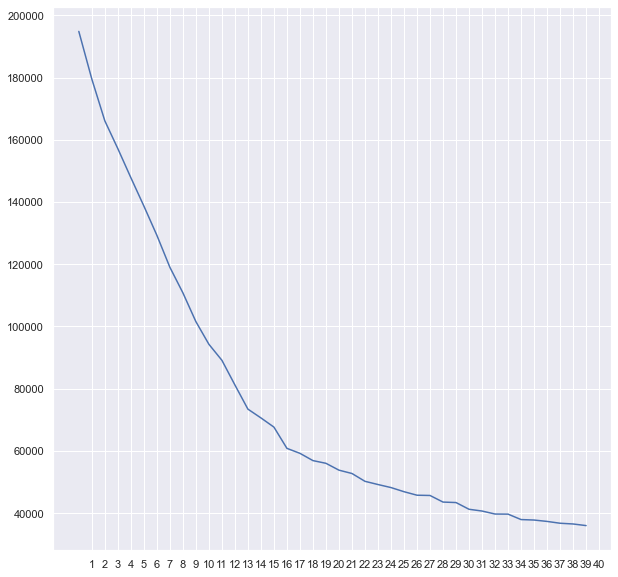

In [86]:
#Felipe Martins Guimarães
resultado['inertia'].plot(xticks=resultado['clusters'])

In [68]:
#Felipe Martins Guimaraes
from sklearn.cluster import KMeans
model = KMeans(n_clusters=14)
model.fit(scaled_genres)

KMeans(n_clusters=14)

In [69]:
df_clusters = pd.DataFrame(model.cluster_centers_, columns=genres.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F1E1DF0>,
      dtype=object)

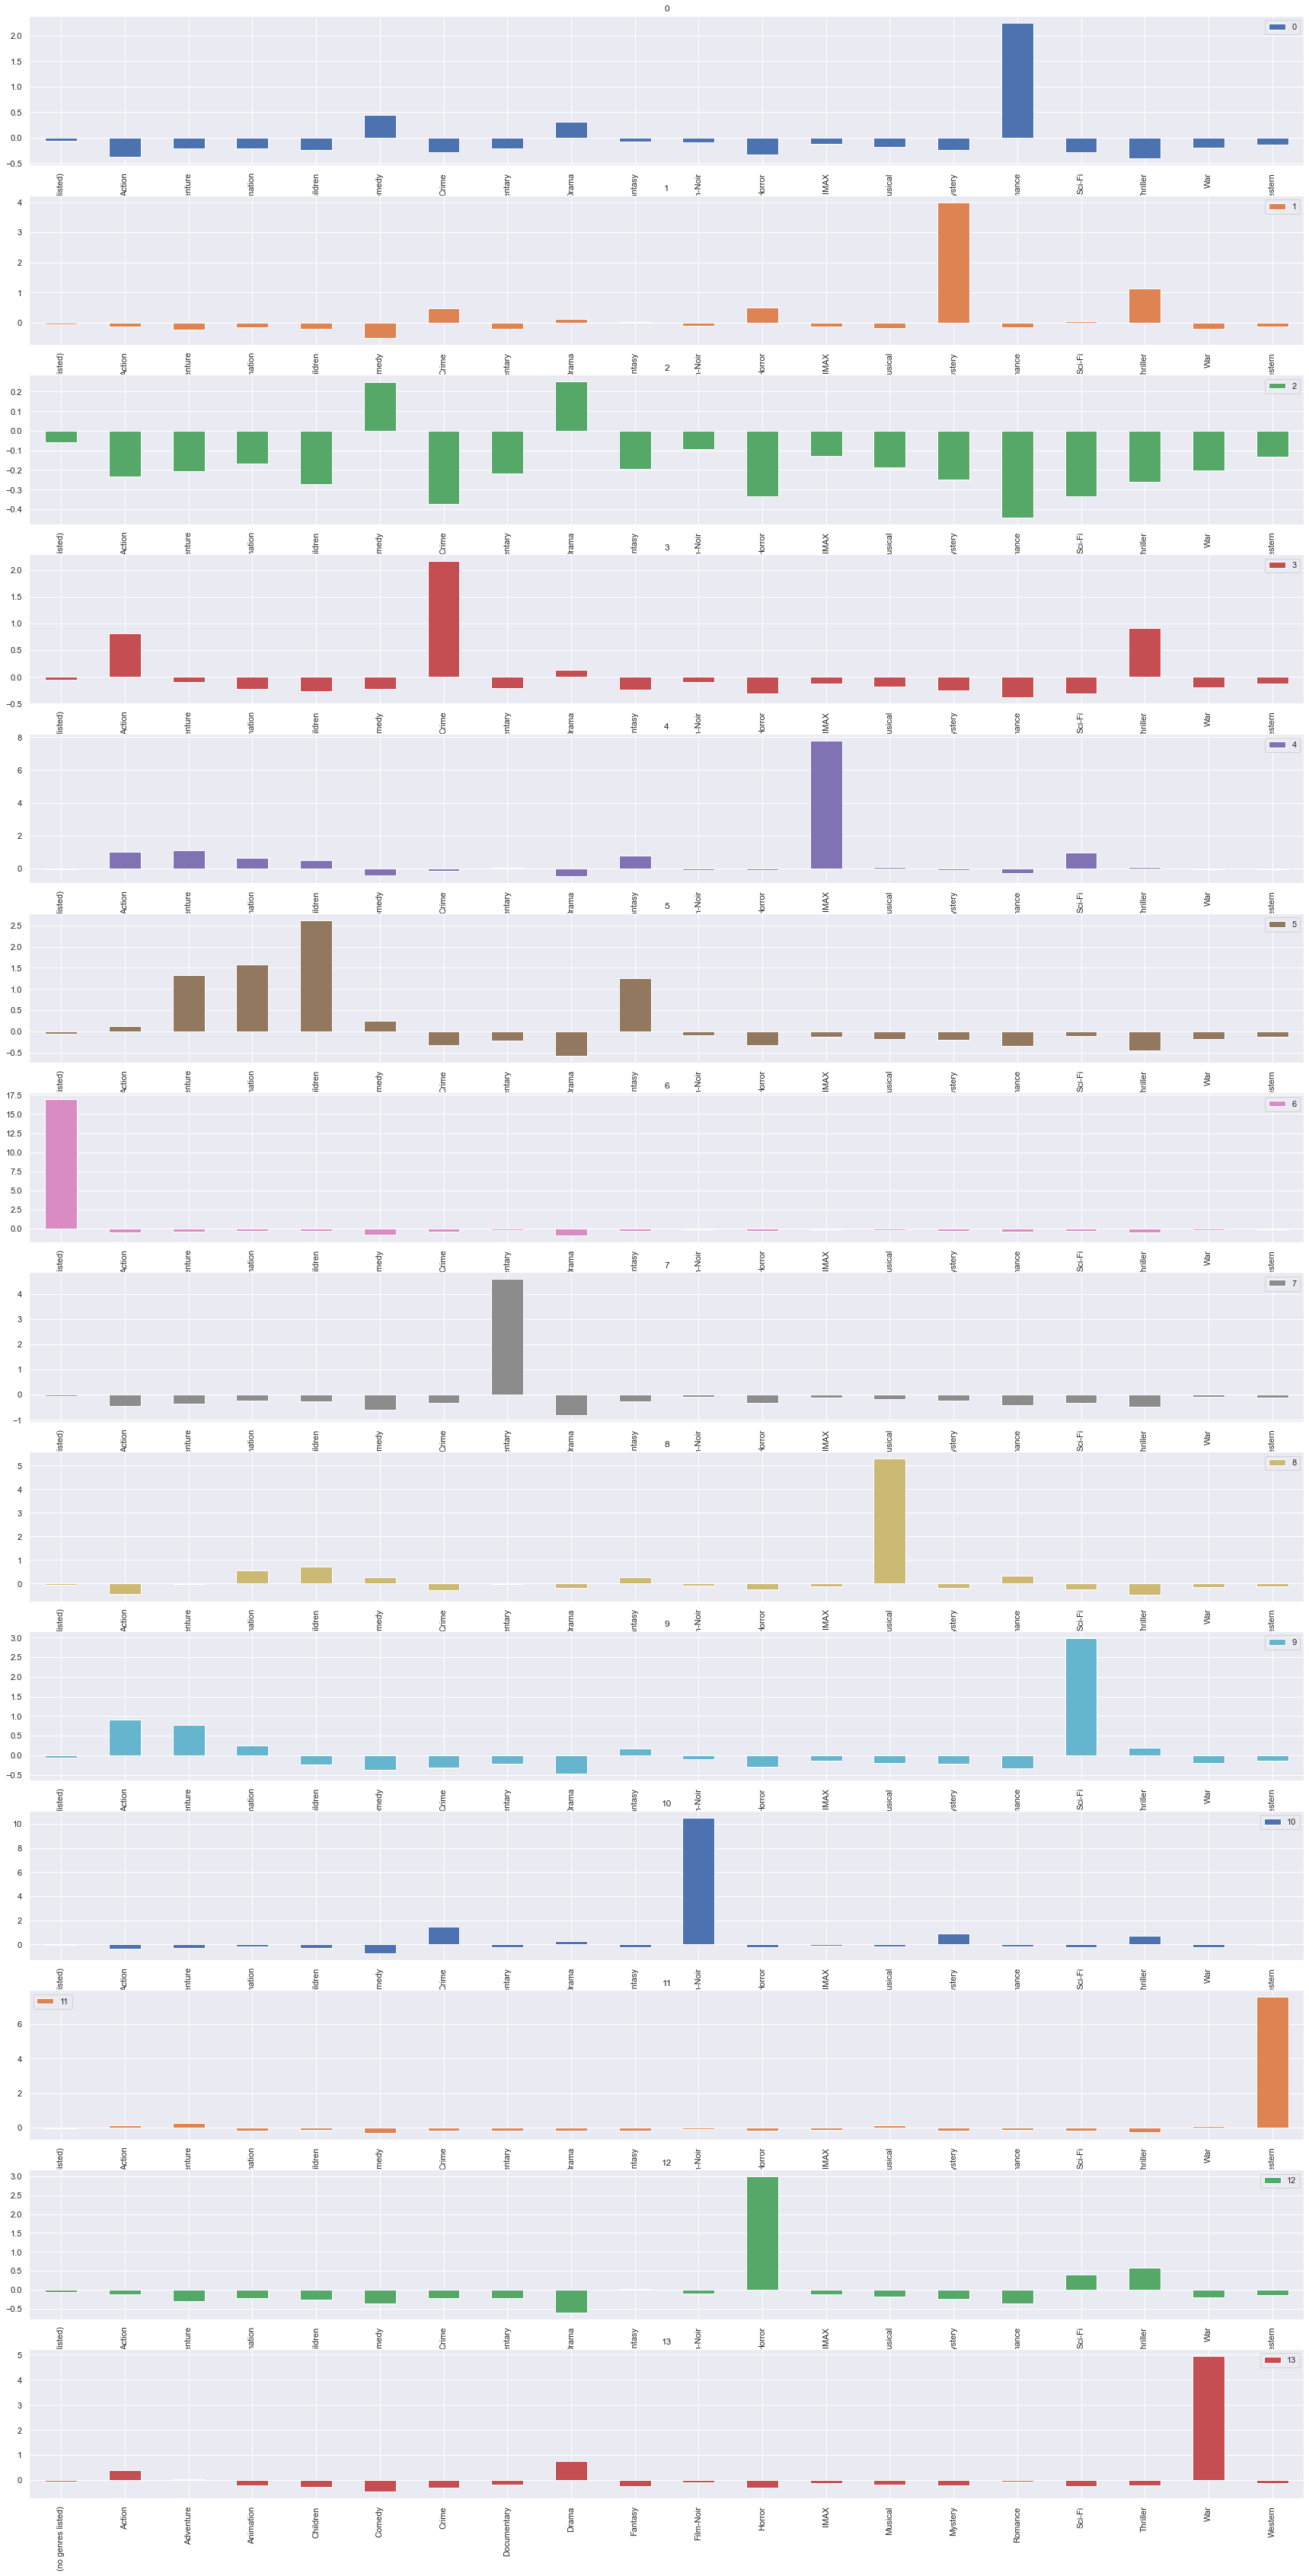

In [70]:
df_clusters.transpose().plot.bar(figsize=(30,60), subplots=True, sharex=False)

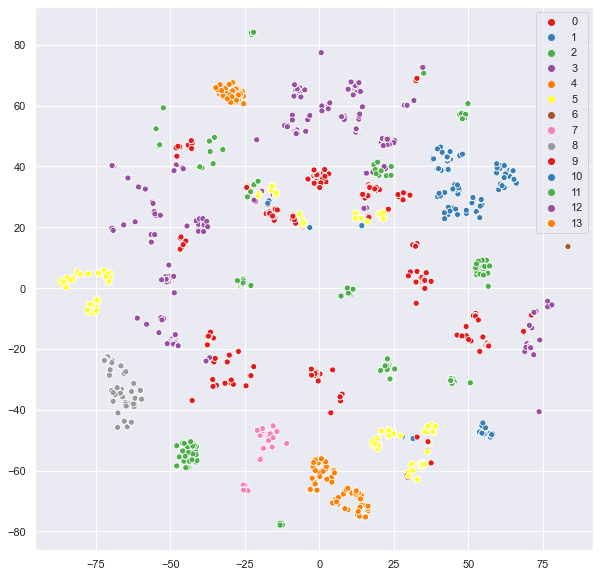

In [71]:
#Felipe Martins Guimaraes
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=model.labels_, palette=sns.color_palette('Set1', 14))

In [72]:
df_movies[model.labels_ == 7]


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
69,77,Nico Icon (1995),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,108,Catwalk (1996),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,116,Anne Frank Remembered (1995),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,128,Jupiter's Wife (1994),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9690,184257,Making a Murderer (2015),Crime|Documentary,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9711,187717,Won't You Be My Neighbor? (2018),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9719,189111,Spiral (2018),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9730,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
